In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('database.csv')
df.sample(3)

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
242261,242262,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,1991,September,4,Murder or Manslaughter,...,Unknown,Female,34,White,Unknown,Son,Unknown,0,0,FBI
121491,121492,AR03501,Pine Bluff,Municipal Police,Jefferson,Arkansas,1986,March,1,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Blunt Object,0,0,FBI
409779,409780,MI82349,Detroit,Municipal Police,Wayne,Michigan,2000,April,20,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI


In [3]:
print(df.shape)
df.columns

(638454, 24)


Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [5]:
df.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [6]:
city_crimes = df.groupby(by='City').count()[['Record ID']]
city_crimes.sort_values(by='Record ID', ascending=False).head(10)

,Record ID
City,
Los Angeles,44511
New York,38431
Cook,22383
Wayne,19904
Harris,16331
Philadelphia,12851
Dallas,11377
Jefferson,9573
Baltimore city,9336


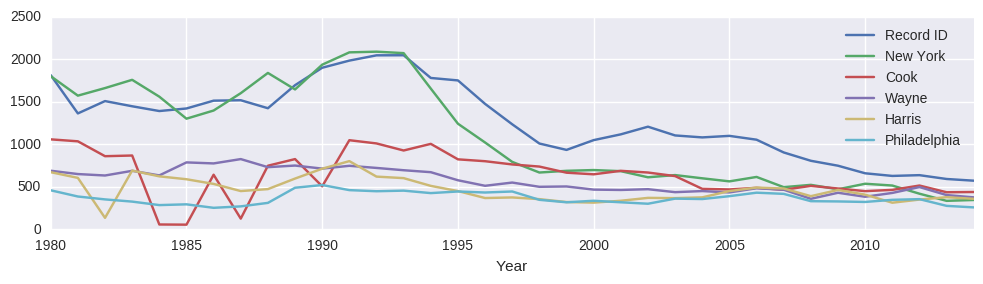

In [7]:
la_crimes =  df[df['City']=='Los Angeles'].groupby(by=['Year']).count()[['Record ID']]
ny_crimes =  df[df['City']=='New York'].groupby(by=['Year']).count()[['Record ID']]
ck_crimes =  df[df['City']=='Cook'].groupby(by=['Year']).count()[['Record ID']]
wy_crimes =  df[df['City']=='Wayne'].groupby(by=['Year']).count()[['Record ID']]
ha_crimes =  df[df['City']=='Harris'].groupby(by=['Year']).count()[['Record ID']]
pha_crimes =  df[df['City']=='Philadelphia'].groupby(by=['Year']).count()[['Record ID']]

c = la_crimes
c['New York'] = ny_crimes
c['Cook'] = ck_crimes
c['Wayne'] = wy_crimes
c['Harris'] = ha_crimes
c['Philadelphia'] = pha_crimes
plt.figure()
la_crimes.plot(figsize=(10,3))
plt.tight_layout()
